# <span style="color:royalblue"> [2주차] 매크로 경제 분석</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# 미국과 한국 주택가격지수 비교 분석 

--- 

<div style="text-align: right"> Final Edition : 2024.07.19<br>
    copyrightⓒ 2024 All rights reserved by Data Lover Pablo </div>

# 1. 미국과 한국의 주택가격지수 비교

## 1.1 미국 주택 가격지수 데이터

### 1.1.1 FRED(Federal Reserve Bank of St. Louis) 미국 연방준비은행 연구소 제공 데이터 수집
* 지수명 : All-Transactions House Price Index for the United States 
* Ticker : USSTHPI
* 기준년월 : 1980.1Q 지수 = 100
* 업데이트 주기 : 분기1회. 2024년 5월 28일에 2023 Q1 데이터 업데이트
* 데이터 링크 : https://fred.stlouisfed.org/series/USSTHPI

<img src="./data/FRED.JPG" alt="Drawing" style="width: 1000px;"/>

In [1]:
# 필요한 패키지 및 모듈 불러오기

import pandas as pd
import numpy as np
from numpy.random import randn

from datetime import datetime, timedelta # 시간과 날짜 간 차이 계산
from dateutil.parser import parse
from pandas.tseries.offsets import Hour, Minute

parse : 파싱은 어떤 페이지(문서, html 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출해 가공하는 것을 말합니다.  

### 1.1.2 데이터 불러오기

In [2]:
# House_Price_Index_US
df_us = pd.read_csv('./data/USSTHPI_202407.csv')
df_us

,DATE,USSTHPI
0,1975-01-01,59.93
1,1975-04-01,60.79
2,1975-07-01,61.21
3,1975-10-01,62.26
4,1976-01-01,62.87
...,...,...
192,2023-01-01,625.42
193,2023-04-01,644.84
194,2023-07-01,656.96
195,2023-10-01,657.70


In [3]:
# 데이터 타입 확인
df_us.dtypes

# us.to_frame()
# 현재 날짜는 문자열, 지수는 정수 타입입니다.

DATE        object
USSTHPI    float64
dtype: object

In [4]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     197 non-null    object 
 1   USSTHPI  197 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


### 1.1.3 데이터 타입 변경(시계열)

In [5]:
df_us['DATE']

0      1975-01-01
1      1975-04-01
2      1975-07-01
3      1975-10-01
4      1976-01-01
          ...    
192    2023-01-01
193    2023-04-01
194    2023-07-01
195    2023-10-01
196    2024-01-01
Name: DATE, Length: 197, dtype: object

In [6]:
# 문자열로 되어 있는 칼럼을 날짜타입으로 변경해줍니다. convert the 'Date' column to datetime format
df_us['DATE']= pd.to_datetime(df_us['DATE'])
 
# Check the format of 'Date' column
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     197 non-null    datetime64[ns]
 1   USSTHPI  197 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [7]:
df_us.shape

(197, 2)

### 1.1.4 미국 주택 가격지수 시각화

rc 파라미터 설정 : [matplotlib 공식 다큐먼트](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html)

<AxesSubplot: xlabel='DATE'>

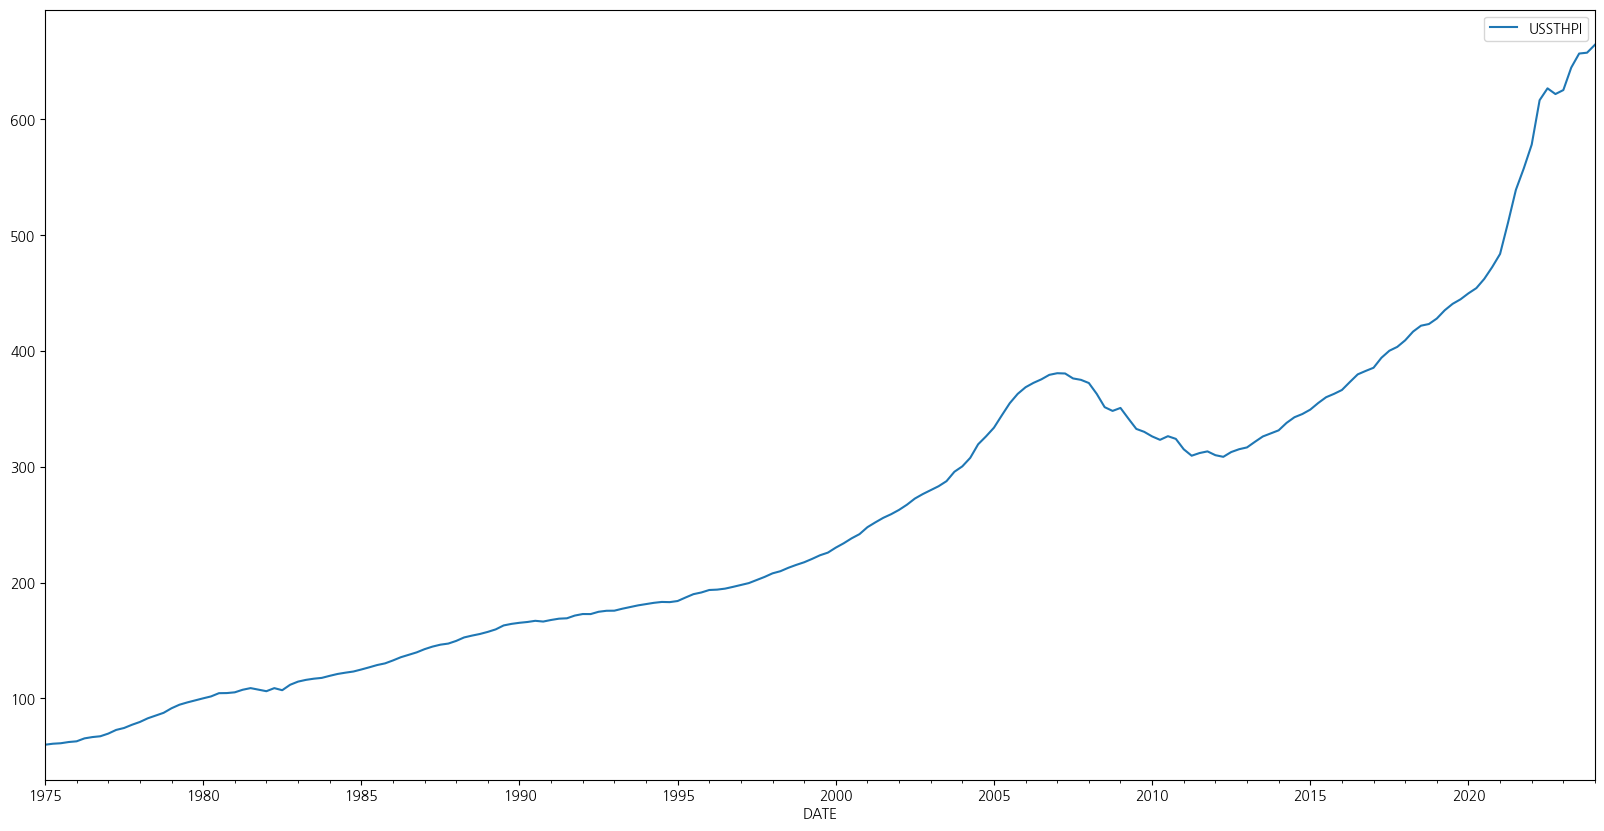

In [10]:
import matplotlib.pyplot as plt
import datetime as dt

plt.style.use('default') 
plt.rc('figure', figsize=(20, 10))
plt.rc('font', family='NanumGothic')

# x축에 날짜, y축에 지수를 넣고 간단히 그려봅니다.
df_us.plot('DATE', 'USSTHPI')

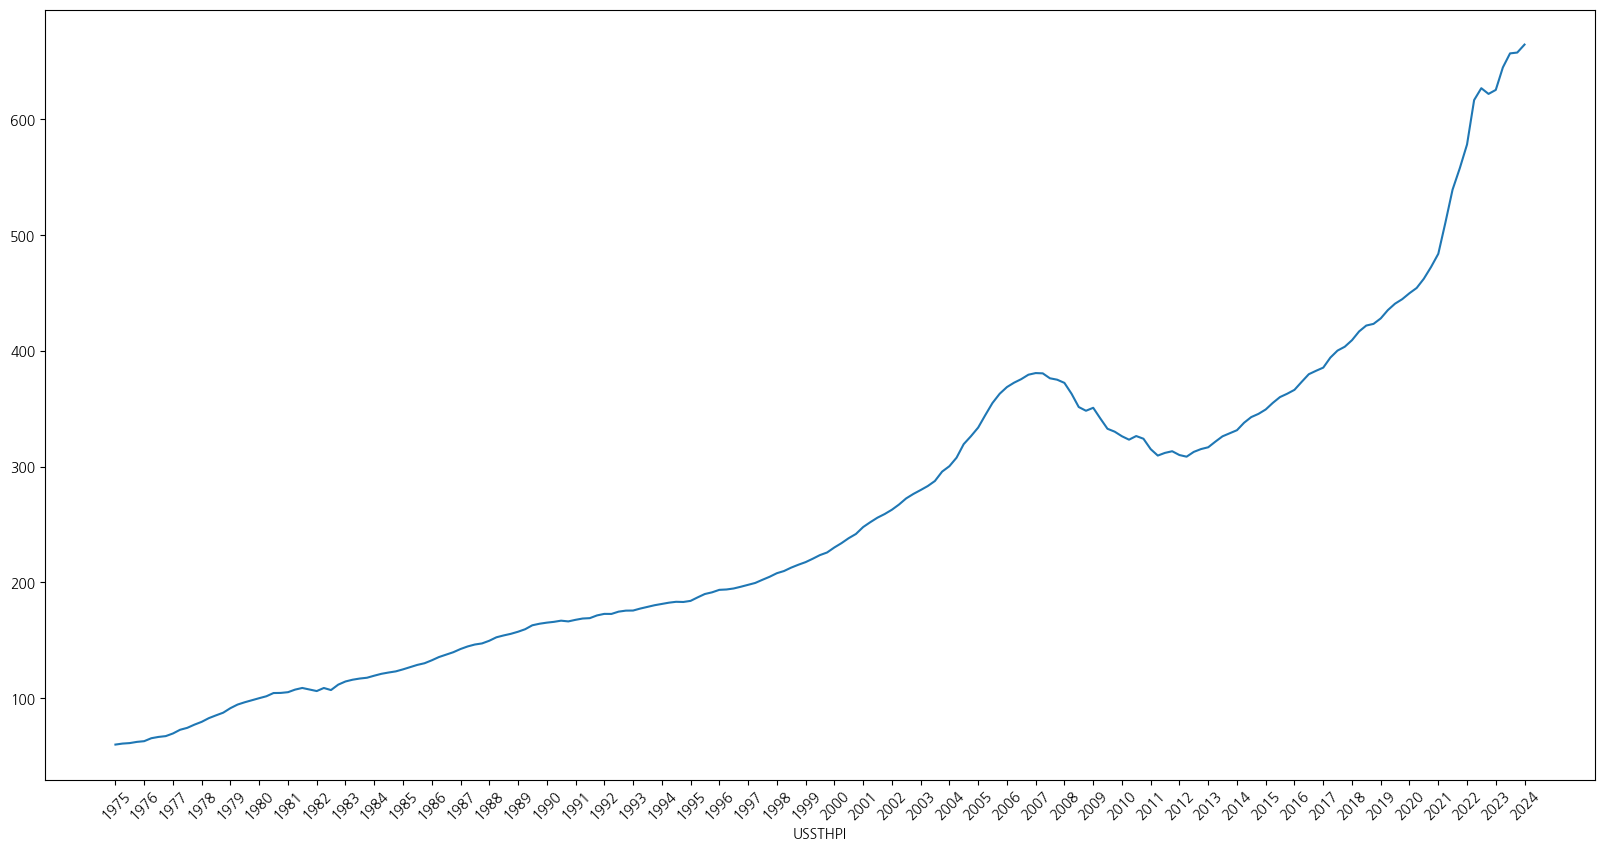

In [11]:
xs      = df_us['DATE'].to_list()
xlabels = df_us['DATE'].dt.year.to_list() # 1975, 1975,1975, 1975, 1976....

ys      = df_us['USSTHPI'].to_list()

plt.plot(xs, ys)

plt.xticks(ticks=xs, labels=xlabels, rotation=45)
plt.xlabel('USSTHPI')

plt.locator_params(axis='x', nbins=len(xlabels)/4)

In [12]:
len(xlabels)

197

In [13]:
x=df_us['DATE'].dt.year
x

0      1975
1      1975
2      1975
3      1975
4      1976
       ... 
192    2023
193    2023
194    2023
195    2023
196    2024
Name: DATE, Length: 197, dtype: int64

## 1.2 한국 공동주택 가격지수 데이터 수집

### 1.2.1 KOSIS 국가통계포털 제공 데이터 수집
* 지수명 : 공동주택 통합 매매 실거래가격지수 (한국부동산원. 2017.11 = 100) cf. 종합주택매매가격지수(2021.6 지수 = 100) 
* 기준년월 : 2017.11 지수 - 100 (2021.6 지수 = 100)
* 수집방법 : 지수산정기간 중 거래신고가 2번 이상 있는 동일 아파트의 가격변동률과 거래량으로 지수 산출
* 조사기관 : [한국부동산원](http://www.r-one.co.kr/rone/resis/statistics/statisticsViewer.do?menuId=HOUSE_21111)
* 제공링크 : https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_KAB_11672_S13&conn_path=I2
* 다운로드 : 1) 항목탭 : "지수" 선택  2) 행정구역별탭 : "전국" 선택  3) 시점탭 : 2006.01 ~ 2021.06 선택  4) 통계표 조회 버튼 클릭
5) 행렬전환 6) 다운로드 버튼 클릭   7) CSV 파일로 저장하고 경로설정

### 1.2.2 데이터 불러오기

In [14]:
import pandas as pd

import warnings
warnings.simplefilter("ignore")

df_kr = pd.read_csv('./data/공동주택_통합_매매_실거래가격지수_20240719235749.csv', encoding='cp949')
df_kr

,시점,전국
0,시점,지수 (2017.11 = 100.0)
1,2006.01,58.2
2,2006.02,58.6
3,2006.03,59.3
4,2006.04,59.7
...,...,...
216,2023.12,120.5
217,2024.01,121.0
218,2024.02,120.9
219,2024.03,121.2


In [15]:
# 1번째 행부터 끝행 까지 데이터를 추출
df_kr = df_kr[1::]

In [16]:
df_kr

,시점,전국
1,2006.01,58.2
2,2006.02,58.6
3,2006.03,59.3
4,2006.04,59.7
5,2006.05,60.2
...,...,...
216,2023.12,120.5
217,2024.01,121.0
218,2024.02,120.9
219,2024.03,121.2


In [17]:
df_us['DATE']

0     1975-01-01
1     1975-04-01
2     1975-07-01
3     1975-10-01
4     1976-01-01
         ...    
192   2023-01-01
193   2023-04-01
194   2023-07-01
195   2023-10-01
196   2024-01-01
Name: DATE, Length: 197, dtype: datetime64[ns]

In [18]:
df_kr['시점']

1      2006.01
2      2006.02
3      2006.03
4      2006.04
5      2006.05
        ...   
216    2023.12
217    2024.01
218    2024.02
219    2024.03
220    2024.04
Name: 시점, Length: 220, dtype: object

In [19]:
# 2가지 문제점 발생.
# 1. 데이터 타입이 object
# 2. 미국은 2021-04-01 이고, 한국은 2006.01 으로 표현이 다릅니다.

# 한국 공동주택 매매가격지수의 시점 칼럼의 데이터 타입도 마찬가지로 문자열 -> datetime으로 변환해주어야 합니다.

In [20]:
# pd.to_datetime(df_us['DATE'])

### 1.2.3 데이터 타입 변경(시계열)

In [21]:
# 시리즈(Series) 데이터를 시계열로 변환하는 방법
pd.to_datetime(df_kr['시점']) #inplace =True

1     2006-01-01
2     2006-02-01
3     2006-03-01
4     2006-04-01
5     2006-05-01
         ...    
216   2023-12-01
217   2024-01-01
218   2024-02-01
219   2024-03-01
220   2024-04-01
Name: 시점, Length: 220, dtype: datetime64[ns]

In [22]:
# 잘못된 예
# df_kr['시점'].to_datetime
# >>> 'Series' object has no attribute 'to_datetime'

In [23]:
import warnings
warnings.filterwarnings("ignore")

# to_datetime() 함수는 inplace = True 라는 인자가 없습니다.

df_us['Time'] = pd.to_datetime(df_us['DATE'])
df_kr['Time'] = pd.to_datetime(df_kr['시점'])

### [참고 Tutorial] 데이터 추출하기 : iloc와 loc 차이

1. iloc  
integer location의 약어. 데이터프레임의 행이나 칼럼을 순서를 index(정수값)으로 추출하는 방식
df.iloc[행 인덱스, 열 인덱스]

2. loc  
loc는 칼럼명을 직접 적거나 특정조건식을 써서 사람이 읽기 편하게 데이터에 접근
df.loc[행 이름, 열 이름]

[pandas 공식 튜토리얼](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [24]:
df_kr.iloc[0]

시점                  2006.01
전국                     58.2
Time    2006-01-01 00:00:00
Name: 1, dtype: object

In [25]:
df_kr.loc[1]

시점                  2006.01
전국                     58.2
Time    2006-01-01 00:00:00
Name: 1, dtype: object

In [26]:
#loc 행이름 열이름
df_kr.loc[1]['전국']

'58.2'

In [27]:
df_us['Time']

0     1975-01-01
1     1975-04-01
2     1975-07-01
3     1975-10-01
4     1976-01-01
         ...    
192   2023-01-01
193   2023-04-01
194   2023-07-01
195   2023-10-01
196   2024-01-01
Name: Time, Length: 197, dtype: datetime64[ns]

In [28]:
df_kr['Time']

1     2006-01-01
2     2006-02-01
3     2006-03-01
4     2006-04-01
5     2006-05-01
         ...    
216   2023-12-01
217   2024-01-01
218   2024-02-01
219   2024-03-01
220   2024-04-01
Name: Time, Length: 220, dtype: datetime64[ns]

## 1.3 한국 데이터와 미국 데이터 병합(Merge)

### 1.3.1 pd.merge_asof 함수
Time-series friendly merging

* pandas는 시계열 데이터 프레임을 합 칠수 있는 특별할 함수를 제공합니다.
* 완전히 일치하는 키 대신에 direction='nearest' 가장 근접한 키를 기반으로 하는 점을 제외하면 left-join과 유사합니다.
* 좌측 데이터 프레임의 각 행에 대해, 좌측 프레임의 키보다 적은 우측 프레임에서 최종 행을 선택합니다.

In [29]:
df_merged = pd.merge_asof(
    df_us, df_kr,
    on='Time', direction='nearest')

In [30]:
df_merged 

,DATE,USSTHPI,Time,시점,전국
0,1975-01-01,59.93,1975-01-01,2006.01,58.2
1,1975-04-01,60.79,1975-04-01,2006.01,58.2
2,1975-07-01,61.21,1975-07-01,2006.01,58.2
3,1975-10-01,62.26,1975-10-01,2006.01,58.2
4,1976-01-01,62.87,1976-01-01,2006.01,58.2
...,...,...,...,...,...
192,2023-01-01,625.42,2023-01-01,2023.01,117.1
193,2023-04-01,644.84,2023-04-01,2023.04,119.7
194,2023-07-01,656.96,2023-07-01,2023.07,121.7
195,2023-10-01,657.70,2023-10-01,2023.10,122.6


In [31]:
# 시점(Time)이 정확히 일치하는 값만 병합해줍니다.

df_merged = pd.merge_asof(
    df_us.sort_values(by='Time'), df_kr.sort_values(by='Time'),
    on='Time', allow_exact_matches=True)

In [32]:
df_merged

,DATE,USSTHPI,Time,시점,전국
0,1975-01-01,59.93,1975-01-01,NaN,NaN
1,1975-04-01,60.79,1975-04-01,NaN,NaN
2,1975-07-01,61.21,1975-07-01,NaN,NaN
3,1975-10-01,62.26,1975-10-01,NaN,NaN
4,1976-01-01,62.87,1976-01-01,NaN,NaN
...,...,...,...,...,...
192,2023-01-01,625.42,2023-01-01,2023.01,117.1
193,2023-04-01,644.84,2023-04-01,2023.04,119.7
194,2023-07-01,656.96,2023-07-01,2023.07,121.7
195,2023-10-01,657.70,2023-10-01,2023.10,122.6


## 1.4 결측치 처리

In [33]:
df_merged.isnull().sum()

DATE         0
USSTHPI      0
Time         0
시점         124
전국         124
dtype: int64

In [34]:
df_merged.isnull()

,DATE,USSTHPI,Time,시점,전국
0,False,False,False,True,True
1,False,False,False,True,True
2,False,False,False,True,True
3,False,False,False,True,True
4,False,False,False,True,True
...,...,...,...,...,...
192,False,False,False,False,False
193,False,False,False,False,False
194,False,False,False,False,False
195,False,False,False,False,False


### 1.4.1 결측치 시각화

<AxesSubplot: >

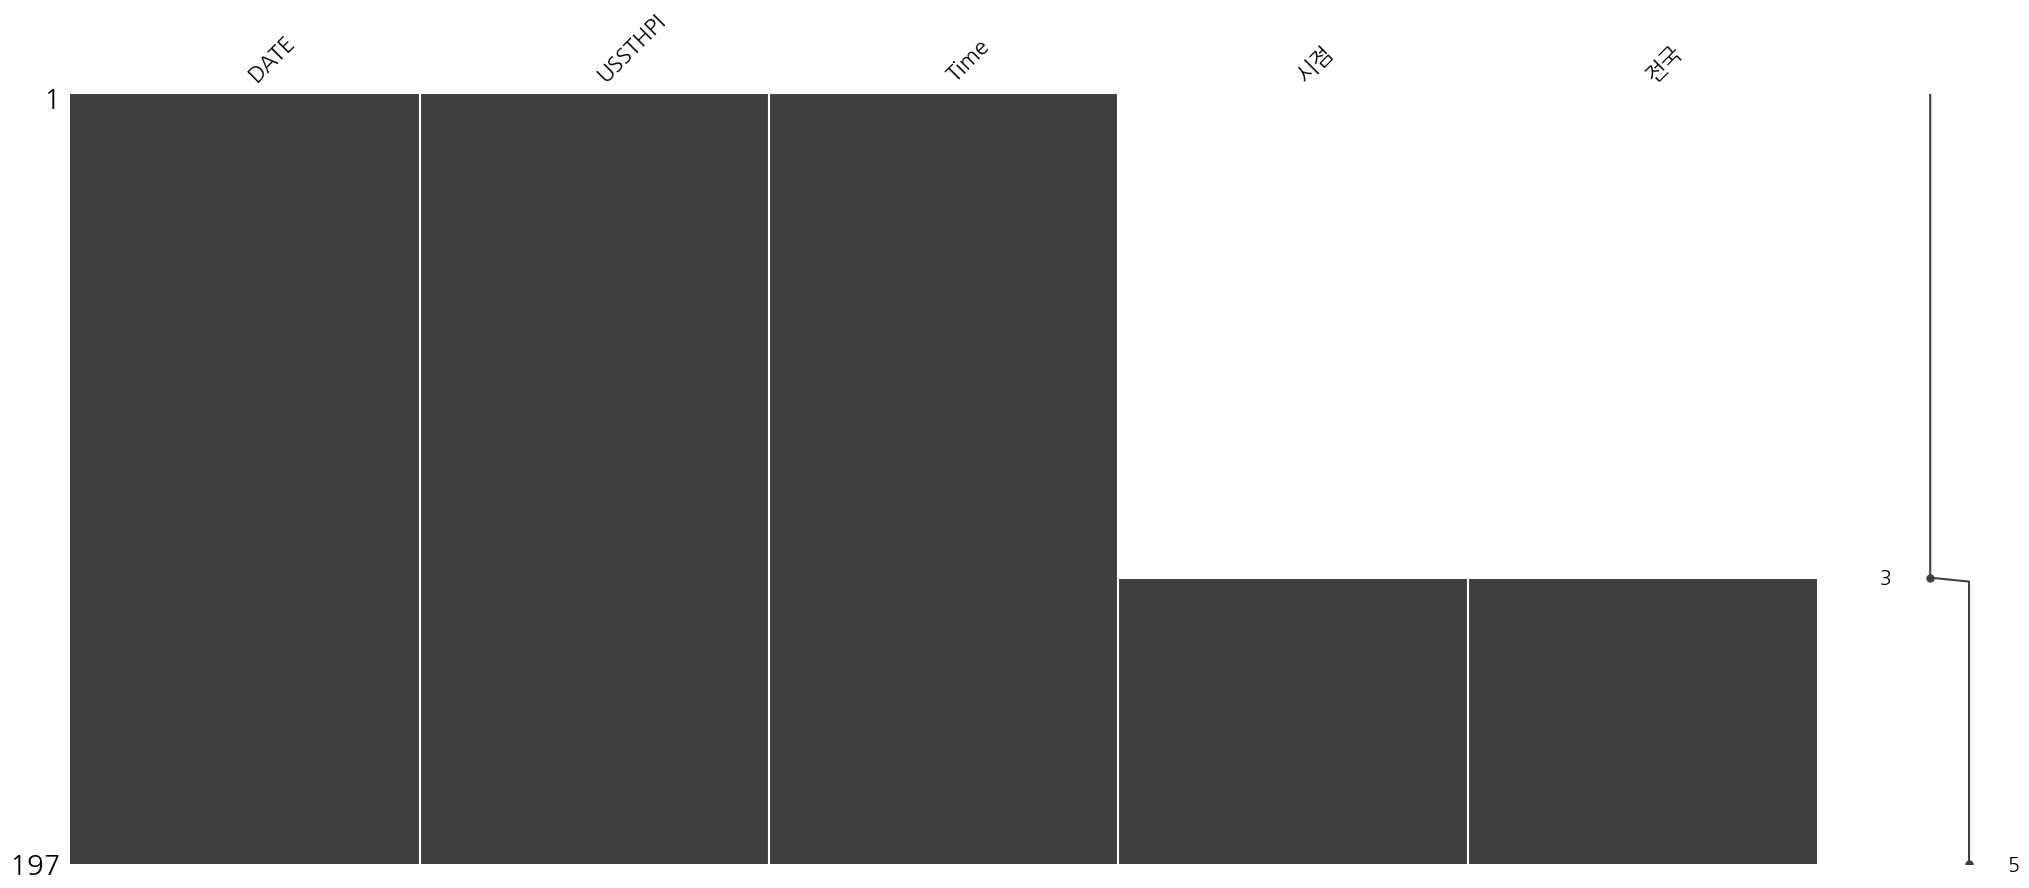

In [35]:
# 패키지를 설치해주세요
# !pip install missingno 
import missingno as msno

# %matplotlib inline # notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줍니다.
plt.rc('font', family = 'NanumGothic')
msno.matrix(df_merged)

In [36]:
# msno.dendrogram(df_merged)
# msno.heatmap(df_merged)
# msno.bar(df_merged)

In [37]:
df_merged.isnull().sum()

DATE         0
USSTHPI      0
Time         0
시점         124
전국         124
dtype: int64

### 1.4.2 결측치 제거

In [38]:
# axis = 0 은 기본값으로 행 방향(가로). axis=1 은 열 방향(세로) 입니다.
df_merged.dropna(axis=0) 

,DATE,USSTHPI,Time,시점,전국
124,2006-01-01,368.73,2006-01-01,2006.01,58.2
125,2006-04-01,372.50,2006-04-01,2006.04,59.7
126,2006-07-01,375.56,2006-07-01,2006.07,61.0
127,2006-10-01,379.42,2006-10-01,2006.10,66.0
128,2007-01-01,380.83,2007-01-01,2007.01,70.9
...,...,...,...,...,...
192,2023-01-01,625.42,2023-01-01,2023.01,117.1
193,2023-04-01,644.84,2023-04-01,2023.04,119.7
194,2023-07-01,656.96,2023-07-01,2023.07,121.7
195,2023-10-01,657.70,2023-10-01,2023.10,122.6


## 1.5 데이터 전처리

In [39]:
# 중요한 데이터 타입을 확인해봅니다. 시점과 인덱스 값이 여전히 문자열(object)입니다.
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     197 non-null    datetime64[ns]
 1   USSTHPI  197 non-null    float64       
 2   Time     197 non-null    datetime64[ns]
 3   시점       73 non-null     object        
 4   전국       73 non-null     object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 9.2+ KB


### 1.5.1 데이터 타입 변경

In [40]:
# 전국의 주택가격지수의 데이터 타입을 문자에서 숫자로 바꿔줍니다.
df_merged['전국'] = df_merged['전국'].astype(np.float64)

In [41]:
df_merged['Time']

0     1975-01-01
1     1975-04-01
2     1975-07-01
3     1975-10-01
4     1976-01-01
         ...    
192   2023-01-01
193   2023-04-01
194   2023-07-01
195   2023-10-01
196   2024-01-01
Name: Time, Length: 197, dtype: datetime64[ns]

In [42]:
df_merged

,DATE,USSTHPI,Time,시점,전국
0,1975-01-01,59.93,1975-01-01,NaN,NaN
1,1975-04-01,60.79,1975-04-01,NaN,NaN
2,1975-07-01,61.21,1975-07-01,NaN,NaN
3,1975-10-01,62.26,1975-10-01,NaN,NaN
4,1976-01-01,62.87,1976-01-01,NaN,NaN
...,...,...,...,...,...
192,2023-01-01,625.42,2023-01-01,2023.01,117.1
193,2023-04-01,644.84,2023-04-01,2023.04,119.7
194,2023-07-01,656.96,2023-07-01,2023.07,121.7
195,2023-10-01,657.70,2023-10-01,2023.10,122.6


In [43]:
# 위에서 dropna를 했음에도 불구하고 NaN 값이 그대로 있습니다. 아래 inplace 개념을 알아두어야 합니다.

### [참고 Tutorial] dropna() 함수 : inplace 파라미터 와 reset_index 함수<br>
[pandas 공식 튜토리얼](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna)  
[R friend 블로그](https://rfriend.tistory.com/263)  
[wikidocs](https://wikidocs.net/136562)  

In [44]:
# dropna() 함수에서 inplace = True 인자값은 기존의 값을 새로운 값으로 대체하라는 옵션
df_merged.dropna(inplace=True)
# df_merged = df_merged.dropna()

# reset_index() 함수에서 drop = True 인자값은 기존 인덱스 칼럼을 삭제하라는 옵션
df_merged.reset_index(drop=True, inplace=True)

### 1.5.2 특정 칼럼 선택

In [45]:
df = df_merged[["Time", "USSTHPI", "전국"]]
df

,Time,USSTHPI,전국
0,2006-01-01,368.73,58.2
1,2006-04-01,372.50,59.7
2,2006-07-01,375.56,61.0
3,2006-10-01,379.42,66.0
4,2007-01-01,380.83,70.9
...,...,...,...
68,2023-01-01,625.42,117.1
69,2023-04-01,644.84,119.7
70,2023-07-01,656.96,121.7
71,2023-10-01,657.70,122.6


### 1.5.3 칼럼 이름 설정

In [46]:
df.columns = ["Time", "US", "KR"]
df

,Time,US,KR
0,2006-01-01,368.73,58.2
1,2006-04-01,372.50,59.7
2,2006-07-01,375.56,61.0
3,2006-10-01,379.42,66.0
4,2007-01-01,380.83,70.9
...,...,...,...
68,2023-01-01,625.42,117.1
69,2023-04-01,644.84,119.7
70,2023-07-01,656.96,121.7
71,2023-10-01,657.70,122.6


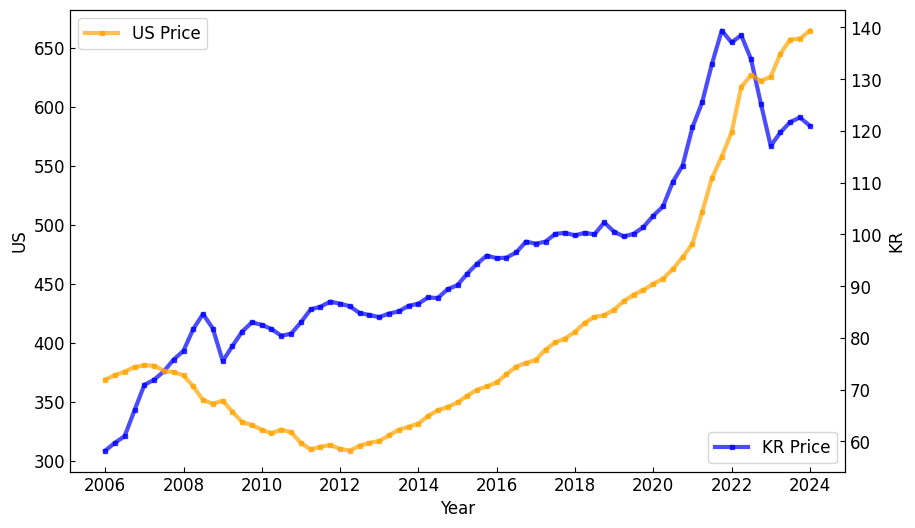

In [47]:
import matplotlib.pyplot as plt

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = df.Time.to_numpy() #df.시점 # df['시점']
y1 = df.US.to_numpy()
y2 = df.KR.to_numpy()

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 미국 인덱스에 대한 값
ax1.plot(x, y1, '-s', color='orange', markersize=3, linewidth=3, alpha=0.7, label='US Price')

# ax1.set_ylim(300, 600)
ax1.set_xlabel('Year')
ax1.set_ylabel('US')
ax1.tick_params(axis='both', direction='in')

# y2 : 한국 인덱스에 대한 값
ax2 = ax1.twinx()
ax2.plot(x, y2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='KR Price')

# ax2.bar(x, y2, color='deeppink', label='KR Price', alpha=0.7, width=30)
# ax2.set_ylim(40, 140)

ax2.set_ylabel('KR')
ax2.tick_params(axis='y', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
# 아래 그림과 같이 zorder가 낮을수록 먼저 그려지고(ax2 = 한국), zorder가 높을수록 나중에 그려집니다.(ax1 = 미국)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.show()

# [기준점 표준화] 데이터 분석 Check Point

-------------------------

## 기준시점에 대한 통일
 - 미국의 주택가격지수 기준시점 : 1980.1분기 = 100
 - 한국의 주택가격지수 기준시점 : 2017.11.1 = 100

In [48]:
df_merged[(df_merged['전국']>99) & (df_merged['전국']<101)]

,DATE,USSTHPI,Time,시점,전국
46,2017-07-01,400.25,2017-07-01,2017.07,100.1
47,2017-10-01,403.58,2017-10-01,2017.10,100.3
48,2018-01-01,409.25,2018-01-01,2018.01,99.8
49,2018-04-01,416.79,2018-04-01,2018.04,100.3
50,2018-07-01,421.88,2018-07-01,2018.07,100.0
52,2019-01-01,428.06,2019-01-01,2019.01,100.5
53,2019-04-01,435.20,2019-04-01,2019.04,99.6
54,2019-07-01,440.75,2019-07-01,2019.07,100.1


In [49]:
base_point_KR = df_merged['전국'][df_merged['DATE']=='2017-07-01']
base_point_KR

46    100.1
Name: 전국, dtype: float64

In [50]:
base_point_US = np.float32(df_merged['USSTHPI'][df_merged['DATE']=='2017-07-01'])
base_point_US

array([400.25], dtype=float32)

In [51]:
# 2017.7 = 100 기준인 US값을 400.67 로 나눠주고 100을 곱해 환산해줍니다.

df_merged['USSTHP(2017.7=100)'] = df_merged['USSTHPI'] / base_point_US * 100

In [52]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                73 non-null     datetime64[ns]
 1   USSTHPI             73 non-null     float64       
 2   Time                73 non-null     datetime64[ns]
 3   시점                  73 non-null     object        
 4   전국                  73 non-null     float64       
 5   USSTHP(2017.7=100)  73 non-null     float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 3.5+ KB


In [53]:
df_merged

,DATE,USSTHPI,Time,시점,전국,USSTHP(2017.7=100)
0,2006-01-01,368.73,2006-01-01,2006.01,58.2,92.124922
1,2006-04-01,372.50,2006-04-01,2006.04,59.7,93.066833
2,2006-07-01,375.56,2006-07-01,2006.07,61.0,93.831355
3,2006-10-01,379.42,2006-10-01,2006.10,66.0,94.795753
4,2007-01-01,380.83,2007-01-01,2007.01,70.9,95.148032
...,...,...,...,...,...,...
68,2023-01-01,625.42,2023-01-01,2023.01,117.1,156.257339
69,2023-04-01,644.84,2023-04-01,2023.04,119.7,161.109307
70,2023-07-01,656.96,2023-07-01,2023.07,121.7,164.137414
71,2023-10-01,657.70,2023-10-01,2023.10,122.6,164.322299


In [54]:
df_merged['USSTHP(2017.7=100)'] 

0      92.124922
1      93.066833
2      93.831355
3      94.795753
4      95.148032
         ...    
68    156.257339
69    161.109307
70    164.137414
71    164.322299
72    166.041224
Name: USSTHP(2017.7=100), Length: 73, dtype: float64

In [55]:
df_merged.dropna(inplace=True)

### 1.5.2 특정 칼럼 선택

In [56]:
df_new = df_merged[["Time", "USSTHP(2017.7=100)", "전국"]]
df_new

,Time,USSTHP(2017.7=100),전국
0,2006-01-01,92.124922,58.2
1,2006-04-01,93.066833,59.7
2,2006-07-01,93.831355,61.0
3,2006-10-01,94.795753,66.0
4,2007-01-01,95.148032,70.9
...,...,...,...
68,2023-01-01,156.257339,117.1
69,2023-04-01,161.109307,119.7
70,2023-07-01,164.137414,121.7
71,2023-10-01,164.322299,122.6


### 1.5.3 칼럼 이름 설정

In [57]:
df_new.columns = ["Time", "US", "KR"]
df_new

,Time,US,KR
0,2006-01-01,92.124922,58.2
1,2006-04-01,93.066833,59.7
2,2006-07-01,93.831355,61.0
3,2006-10-01,94.795753,66.0
4,2007-01-01,95.148032,70.9
...,...,...,...
68,2023-01-01,156.257339,117.1
69,2023-04-01,161.109307,119.7
70,2023-07-01,164.137414,121.7
71,2023-10-01,164.322299,122.6


# 1.6 미국과 한국 주택가격지수 시각화

### 1.6.1 데이터 병합 주택가격지수 그래프

In [58]:
df_new

,Time,US,KR
0,2006-01-01,92.124922,58.2
1,2006-04-01,93.066833,59.7
2,2006-07-01,93.831355,61.0
3,2006-10-01,94.795753,66.0
4,2007-01-01,95.148032,70.9
...,...,...,...
68,2023-01-01,156.257339,117.1
69,2023-04-01,161.109307,119.7
70,2023-07-01,164.137414,121.7
71,2023-10-01,164.322299,122.6


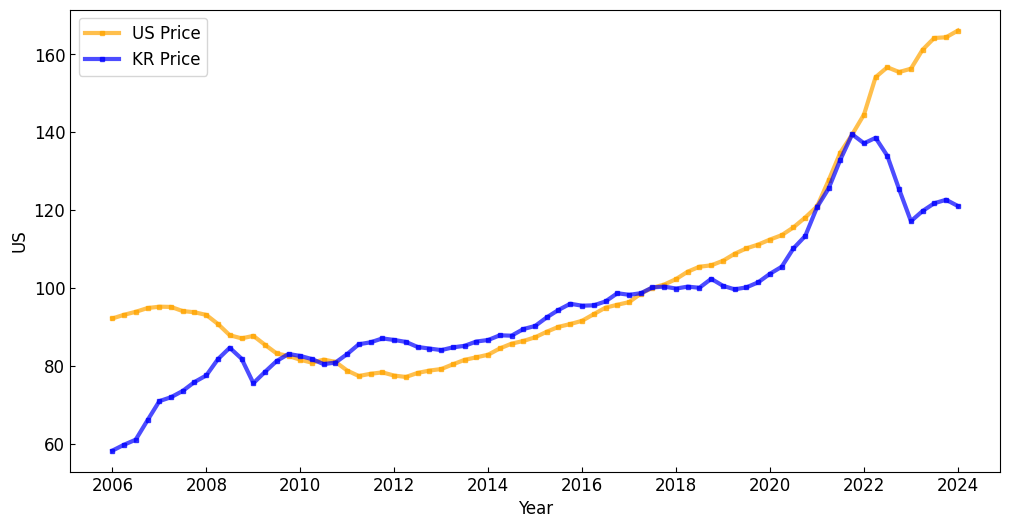

In [59]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = df_new.Time.to_numpy()
y1 = df_new.US.to_numpy()
y2 = df_new.KR.to_numpy()

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 : 미국 인덱스에 대한 값
ax1.plot(x, y1, '-s', color='orange', markersize=3, linewidth=3, alpha=0.7, label='US Price')

# y2 : 한국 인덱스에 대한 값
ax1.plot(x, y2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='KR Price')

ax1.set_xlabel('Year')
ax1.set_ylabel('US')
ax1.tick_params(axis='both', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
# 아래 그림과 같이 zorder가 낮을수록 먼저 그려지고(ax2 = 한국), zorder가 높을수록 나중에 그려집니다.(ax1 = 미국)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
ax1.legend(loc='upper left')

plt.show()

## 1.7 상관관계


*  <span style="color:royalblue">피어슨<br>
  - 상관관계에서 기본적으로 사용되는 상관계수<br>
  - 연속형변수의 상관관계 측정<br>
  - 모수 검정(parametric test)<br><br></span>

  
* 켄달
  - 켄달 상관계수(타우)
  - 변수값 대신 순위로 바꿔 이용(내신등급, 학점)
  - 비모수 검정(Non-parametric test)
  - sample size가 작을때. 데이터중 같은 값이 많을때 사용<br><br>
  
* 스피어만 
  - 스피어만 상관계수
  - 켄달과 동일한 순위기준 상관계수
  - 비모수 검정(Non-parametric test)
  - 데이터 내 편차와 이상치에 민감. 켄달보다 높은 상관관계 수치를 보임<br><br>

[피어슨, 켄달, 스피어만 차이점 수식](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/)

### 상관관계 정도
<img src="./data/상관관계정도.png" alt="Drawing" style="width: 400px;"/>

[요점정리]
1. 피어슨(Pearson) 상관계수는 두 수치형 변수 사이의 "선형" 관계를 평가합니다. 
2. 스피어만(Spearman) 상관계수는 원시 데이터가 아니라 각 변수에 대해 "순위" 를 매긴 값을 기반으로 합니다.<br>
   "순서형 변수" 가 포함된 관계를 평가하기 위해 사용됩니다.

In [60]:
# US_CS_M2.corr(method='pearson', min_periods=1)
df.corr(method='pearson', min_periods=1)

,US,KR
US,1.000000,0.826839
KR,0.826839,1.000000


[판다스 공식 튜토리얼 - pd.corr 상관계수](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr)

## 학습내용 정리요약
- 날짜, 시간데이터 Date and Time Data Types and Tools
- 타임시리즈 Time Series Basics  
<br>
- 결측치 시각화와 결측치 처리
- merge_asof() 함수 , 데이터 타입변경
- dropna(), reset_index() 함수와  inplace, drop 인자값
- 타임 시리즈 자료 플롯팅 Time Series Plotting
- 상관관계 correlation

# 2. 주요 선진국 주택 가격지수 데이터 수집 및 분석

[통계청 제공 국외통계작성기관](http://kostat.go.kr/portal/korea/kor_ko/7/4/2/index.action)

## 2.1 영국 주택 가격지수 데이터 <img src="./data/영국.png" alt="Drawing" style="width: 30px;" align="left">

### 2.1.1  영국 통계청(ONS : Office for National Statistics) 제공 데이터 수집
* 지수명 ; UK House Price Index 
* 경로 : Home > Economy > Inflation and price indices > UK House Price Index
* 제공데이터 : 평균 실거래가, 변동률 두가지 지표
* 제공기관 : 영국 통계청 https://www.ons.gov.uk/ (영국통계청은 영국 의회 직속인 독립적인 통계 기관입니다.)
* 데이터 링크 : [영국 주택가격 지수](https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/housepriceindex/october2021)

## 2.2 독일 주택 가격지수 데이터 <img src="./data/독일.jpg" alt="Drawing" style="width: 30px;" align="left">

### 2.2.1  독일 통계청(Statistisches Bundesamt) 제공 데이터 수집
* 지수명 ; House Price Index 
* 경로 : [Construction prices and real property prices](https://www-genesis.destatis.de/genesis//online?operation=table&code=61262-0001&bypass=true&levelindex=0&levelid=1633940589196#abreadcrumb)
* 제공데이터 : HOUSE PRICE INDEX(2015  = 100), 변동률 두가지 지표
* 제공기관 : 독일 통계청 https://www.destatis.de/DE/Home
* 데이터 링크 : [독일 주택가격 지수](https://www.destatis.de/EN/Press/2021/12/PE21_593_61262.html)

## 2.3 주요국의 주택가격지수 비교(FRED 데이터 제공)

[캐나다, 뉴질랜드, 홍콩, 영국 주택가격지수 비교](https://fredblog.stlouisfed.org/2017/12/houses-up-and-down/?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=fredblog)

# 3. 명목 주택가격 및 실질 주택가격 [각자 학습]

## 3.1 명목 주택가격 : 주택의 절대적인 가격

## 3.2 실질 주택가격 : 명목 주택가격 - 물가 상승률